In [1]:
import os
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from preprocessing_functions import *

images_pid, images_image, images_label, images_mask = read_images_to_array('data/images/')
images_label_string = convert_labels_to_strings(images_label)

1070.mat
1071.mat
1072.mat
1073.mat
1074.mat
1075.mat
1076.mat
1203.mat
1204.mat
1205.mat
1206.mat
1207.mat
955.mat
956.mat
957.mat


# normalization min-max

In [2]:
min_val = np.min(images_image)
print(min_val)

0


In [3]:
max_val = np.max(images_image)
print(max_val)

12728


In [4]:
images_image = (images_image - min_val) / (max_val - min_val)

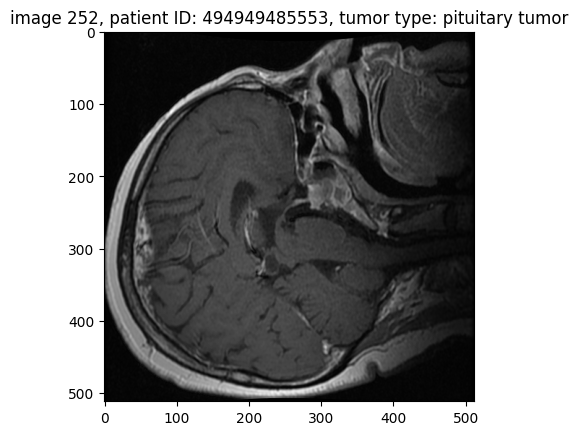

In [5]:
plot_image(252, images_pid, images_image, images_label_string, images_mask,
           show_mask = False)

# train - test split

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(images_image, images_label,
                                                    test_size = 0.20, random_state = 42, shuffle = True)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2439, 512, 512) (610, 512, 512) (2439,) (610,)


In [7]:
X_val = X_train[:610]
X_train = X_train[610:]

y_val = y_train[:610]
y_train = y_train[610:]

print(X_val.shape, X_train.shape, y_val.shape, y_train.shape)

(610, 512, 512) (1829, 512, 512) (610,) (1829,)


In [8]:
X_train = X_train.reshape(X_train.shape[0], 512*512)
X_val = X_val.reshape(X_val.shape[0], 512*512)
X_test = X_test.reshape(X_test.shape[0], 512*512)

In [9]:
X_test.shape

(610, 262144)

In [36]:
X_train.shape

(1829, 262144)

# labels to one hot encoding

In [10]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

print(y_train[:5])
print(y_train.shape, y_val.shape, y_test.shape)

[[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]
(1829, 3) (610, 3) (610, 3)


# testing simple networks

In [14]:
import keras

model1 = keras.Sequential()
model1.add(keras.layers.Dense(512, activation = 'relu'))
model1.add(keras.layers.Dense(256, activation = 'relu'))
model1.add(keras.layers.Dense(64, activation = 'relu'))
model1.add(keras.layers.Dense(3, activation = 'softmax'))

model1.compile(loss = 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])

history1 = model1.fit(X_train, y_train, epochs = 50, validation_data = (X_val, y_val))

Epoch 1/50
58/58 [==============================] - 62s 1s/step - loss: 2.6462 - accuracy: 0.5358 - val_loss: 1.6099 - val_accuracy: 0.6262
Epoch 2/50
58/58 [==============================] - 56s 954ms/step - loss: 0.8197 - accuracy: 0.6331 - val_loss: 0.6750 - val_accuracy: 0.7098
Epoch 3/50
58/58 [==============================] - 55s 951ms/step - loss: 0.7006 - accuracy: 0.6878 - val_loss: 0.5724 - val_accuracy: 0.7295
Epoch 4/50
58/58 [==============================] - 57s 983ms/step - loss: 0.5917 - accuracy: 0.7179 - val_loss: 0.6055 - val_accuracy: 0.7033
Epoch 5/50
58/58 [==============================] - 57s 980ms/step - loss: 0.6332 - accuracy: 0.7283 - val_loss: 0.5593 - val_accuracy: 0.7393
Epoch 6/50
58/58 [==============================] - 56s 970ms/step - loss: 0.5236 - accuracy: 0.7463 - val_loss: 0.8723 - val_accuracy: 0.4787
Epoch 7/50
58/58 [==============================] - 55s 948ms/step - loss: 0.5284 - accuracy: 0.7343 - val_loss: 0.5181 - val_accuracy: 0.7672
Ep

In [17]:
def makeGraph(history_dict, fname):
  train_values = history_dict[fname]
  val_values = history_dict[f"val_{fname}"]
  epochs = range(1, len(val_values) + 1)
  plt.plot(epochs, train_values, label = f"training {fname}")
  plt.plot(epochs, val_values, label = f"validation {fname}")
  plt.xticks(epochs)
  plt.grid(True)
  plt.legend()

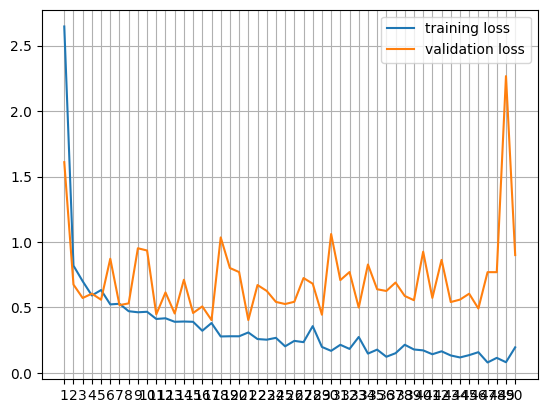

In [18]:
makeGraph(history1.history, "loss")

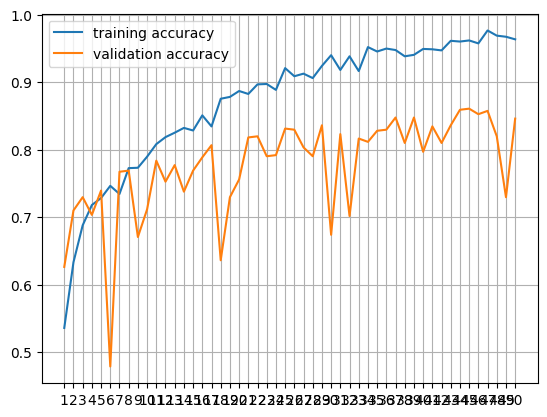

In [19]:
makeGraph(history1.history, "accuracy")

In [29]:
model1.evaluate(X_test, y_test)

20/20 [==============================] - 4s 84ms/step - loss: 0.7627 - accuracy: 0.8689


[0.7626984119415283, 0.868852436542511]

In [24]:
model2 = keras.Sequential()
model2.add(keras.layers.Dense(512, activation = 'relu'))
model2.add(keras.layers.Dropout(rate = 0.25))
model2.add(keras.layers.Dense(256, activation = 'relu'))
model2.add(keras.layers.Dropout(rate = 0.25))
model2.add(keras.layers.Dense(128, activation = 'relu'))
model2.add(keras.layers.Dense(64, activation = 'relu'))
model2.add(keras.layers.Dense(3, activation = 'softmax'))

model2.compile(loss = 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])

history2 = model2.fit(X_train, y_train, epochs = 50, validation_data = (X_val, y_val))

Epoch 1/50
58/58 [==============================] - 64s 1s/step - loss: 1.8167 - accuracy: 0.5161 - val_loss: 0.9095 - val_accuracy: 0.4164
Epoch 2/50
58/58 [==============================] - 55s 944ms/step - loss: 0.7879 - accuracy: 0.6588 - val_loss: 0.6406 - val_accuracy: 0.7000
Epoch 3/50
58/58 [==============================] - 56s 962ms/step - loss: 0.7277 - accuracy: 0.6823 - val_loss: 0.7086 - val_accuracy: 0.7000
Epoch 4/50
58/58 [==============================] - 63s 1s/step - loss: 0.6912 - accuracy: 0.6966 - val_loss: 0.8676 - val_accuracy: 0.5902
Epoch 5/50
58/58 [==============================] - 60s 1s/step - loss: 0.6455 - accuracy: 0.7037 - val_loss: 0.7348 - val_accuracy: 0.6377
Epoch 6/50
58/58 [==============================] - 59s 1s/step - loss: 0.6304 - accuracy: 0.7201 - val_loss: 0.8024 - val_accuracy: 0.6311
Epoch 7/50
58/58 [==============================] - 57s 988ms/step - loss: 0.6143 - accuracy: 0.7266 - val_loss: 0.5658 - val_accuracy: 0.7213
Epoch 8/50


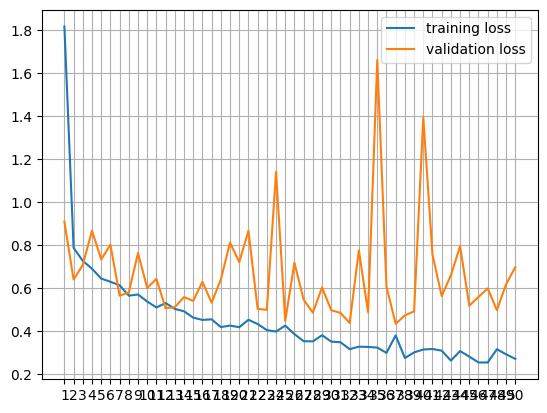

In [27]:
makeGraph(history2.history, "loss")

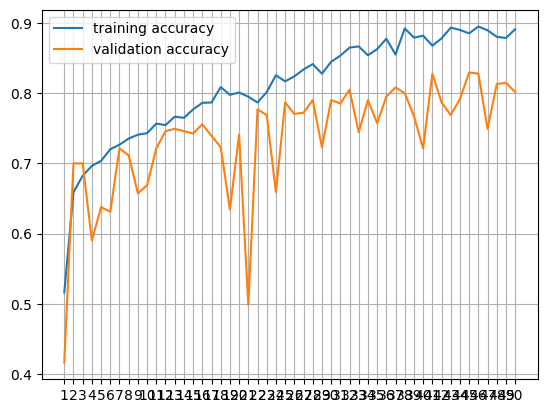

In [28]:
makeGraph(history2.history, "accuracy")

In [30]:
model2.evaluate(X_test, y_test)

20/20 [==============================] - 2s 87ms/step - loss: 0.6345 - accuracy: 0.8180


[0.6345434188842773, 0.8180328011512756]

# convolutional networks

In [38]:
X_train.shape

(1829, 262144)

In [39]:
X_train = X_train.reshape(1829, 512, 512, 1)
X_train.shape

(1829, 512, 512, 1)

In [41]:
X_val = X_val.reshape(610, 512, 512, 1)
X_val.shape

(610, 512, 512, 1)

In [42]:
X_test = X_test.reshape(610, 512, 512, 1)
X_test.shape

(610, 512, 512, 1)

In [44]:
inputs = keras.Input(shape = (512, 512, 1))

hidden = keras.layers.Conv2D(filters = 32, kernel_size = 8, activation = "relu")(inputs)
hidden = keras.layers.MaxPooling2D(pool_size = 2)(hidden)
hidden = keras.layers.Conv2D(filters = 64, kernel_size = 8, activation = "relu")(hidden)
hidden = keras.layers.MaxPooling2D(pool_size = 2)(hidden)
hidden = keras.layers.Conv2D(filters = 128, kernel_size = 4, activation = "relu")(hidden)
hidden = keras.layers.Flatten()(hidden)

outputs = keras.layers.Dense(3, activation = "softmax")(hidden)

model3 = keras.Model(inputs = inputs, outputs = outputs)
model3.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 512, 512, 1)]     0         
                                                                 
 conv2d_9 (Conv2D)           (None, 505, 505, 32)      2080      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 252, 252, 32)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 245, 245, 64)      131136    
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 122, 122, 64)     0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 119, 119, 128)     1312

In [ ]:
model3.compile(loss = 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])
history3 = model3.fit(X_train, y_train, epochs = 50, validation_data = (X_val, y_val))

Epoch 1/50
22/58 [==========>...................] - ETA: 9:00 - loss: 1.2652 - accuracy: 0.4261